<a href="https://colab.research.google.com/github/hasanalpay/machine-learning/blob/main/Customers_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Kümeleme  

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [23]:
data = pd.read_csv("Mall_Customers.csv")
x = data.drop(columns=["CustomerID"])
x=x.drop(columns=["Genre"])
x.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


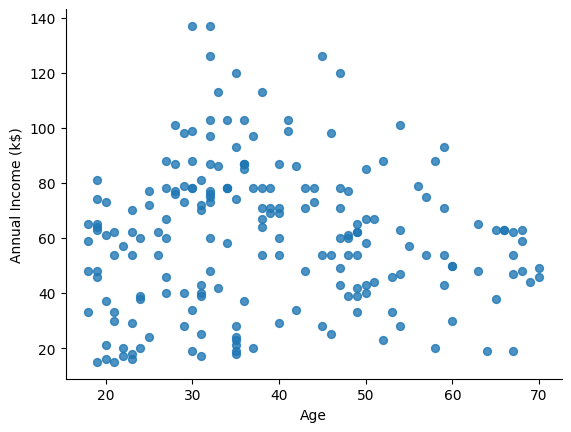

In [39]:
# @title Age vs Annual Income (k$)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

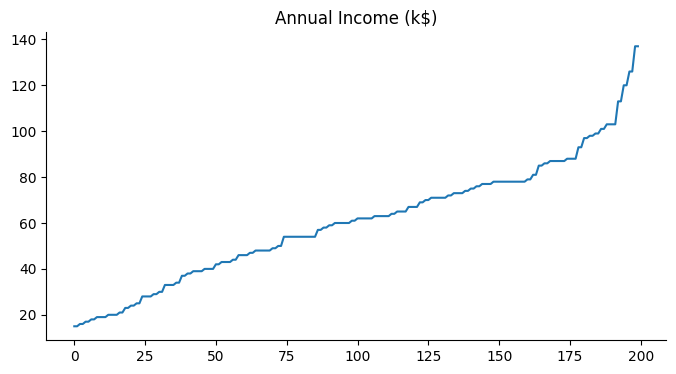

In [38]:
# @title Annual Income (k$)

from matplotlib import pyplot as plt
x['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [25]:
scaled_x

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [26]:
x1=pd.DataFrame(scaled_x,columns=["Yaş","Yılık Gelir (k$)","Harcama Puanı (1-100)"])
x1

,Yaş,Yılık Gelir (k$),Harcama Puanı (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [27]:
x1["Cinsiyet"]=data["Genre"]
x1.head(5)

,Yaş,Yılık Gelir (k$),Harcama Puanı (1-100),Cinsiyet
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female


In [28]:
x1=pd.get_dummies(x1,columns=["Cinsiyet"], drop_first=True)
x1.head(5)

,Yaş,Yılık Gelir (k$),Harcama Puanı (1-100),Cinsiyet_Male
0,-1.424569,-1.738999,-0.434801,True
1,-1.281035,-1.738999,1.195704,True
2,-1.352802,-1.700830,-1.715913,False
3,-1.137502,-1.700830,1.040418,False
4,-0.563369,-1.662660,-0.395980,False


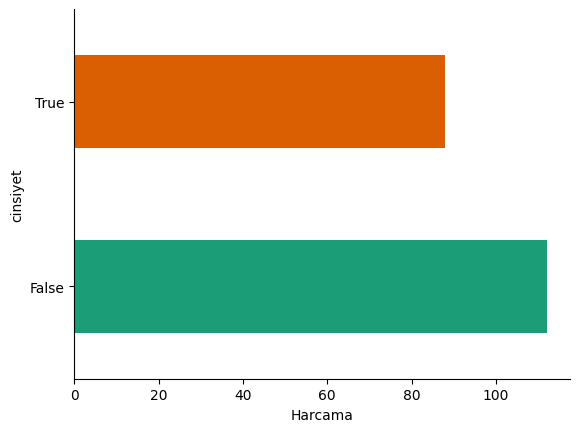

In [37]:
# title Cinsiyet_Male

from matplotlib import pyplot as plt
import seaborn as sns
x1.groupby('Cinsiyet_Male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.ylabel("cinsiyet")
plt.xlabel("Harcama")

plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0, 0.5, 'Öklid uzaklıklığı')

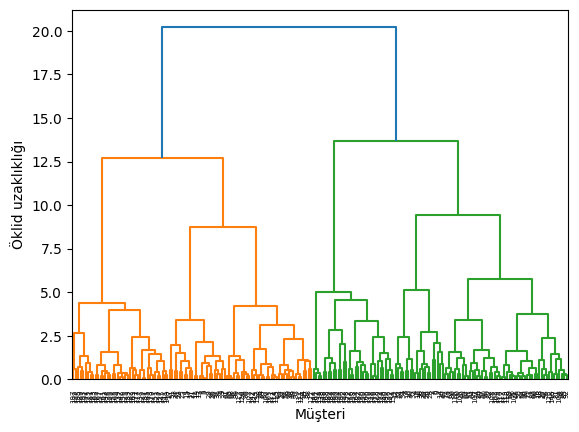

In [41]:
import scipy.cluster.hierarchy as sch
de=sch.dendrogram(sch.linkage(x1,method="ward"))

plt.xlabel("Müşteri")
plt.ylabel("Öklid uzaklıklığı")

In [44]:
x=x1
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(x)

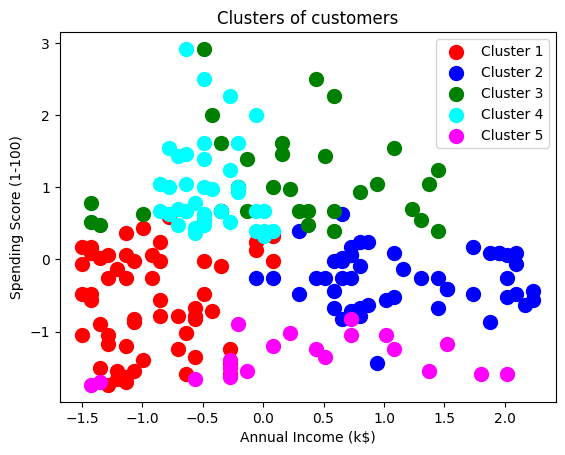

In [48]:
plt.scatter(x.iloc[y_hc == 0, 0], x.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x.iloc[y_hc == 1, 0], x.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x.iloc[y_hc == 2, 0], x.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x.iloc[y_hc == 3, 0], x.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x.iloc[y_hc == 4, 0], x.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()